# Decision Tree and Random Forest Classifier

#### *titanic.csv* dataset

In this assignment, we will analyze the Titanic dataset with the Decision Tree model and the Random Forest model.

On April 15, 1912, during her maiden voyage, the widely considered unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

1. Load the data using the code given below. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: int(x == 'male'))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The features are:
- Survived: whether the passenger survived. This is the target feature.
- Pclass: the ticket class
- Sex: 0 means female, 1 means male.
- Age
- SibSp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Fare

2. Split the data into training set (80%) and test set (20%)
3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
4. Use `plot_tree` function from `sklearn` to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement `plt.figure(figsize=(12,12))` **before** the `plot_tree` statement to make the graph larger.
5. Build a random forest model with the same `max_depth` value and `n_estimators=100`. Show the accuracy score on the test set.

In [3]:
# 2.

In [4]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [5]:
X = titanic[input_cols]

In [6]:
y = titanic.Survived

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# 3.

In [9]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 

tree_clf2 = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [10]:
tree_clf3 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
tree_clf3.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
tree_clf4 = DecisionTreeClassifier(max_depth=4,
                                  random_state=42)
tree_clf4.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [12]:
#Predictions
y_pred2 = tree_clf2.predict(X_test)

In [13]:
y_pred3 = tree_clf3.predict(X_test)

In [14]:
y_pred4 = tree_clf4.predict(X_test)

In [15]:
print("Accuracy max_depth = 2:",metrics.accuracy_score(y_test, y_pred2))

Accuracy max_depth = 2: 0.7972027972027972


In [16]:
print("Accuracy max_depth = 3:",metrics.accuracy_score(y_test, y_pred3))

Accuracy max_depth = 3: 0.8321678321678322


In [17]:
print("Accuracy max_depth = 4:",metrics.accuracy_score(y_test, y_pred4))

Accuracy max_depth = 4: 0.8111888111888111


In [18]:
print("max_depth 3 has the best performance")

max_depth 3 has the best performance


In [19]:
# 4.

In [20]:
from sklearn.tree import plot_tree

Decision Tree: max_depth = 3


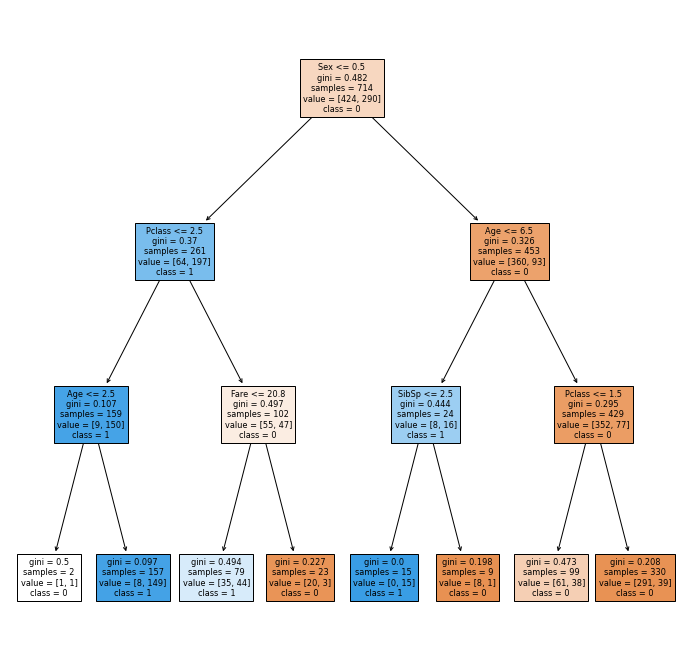

In [21]:
plt.figure(figsize=(12,12))
plot_tree(tree_clf3, feature_names=X.columns, filled=True, class_names = titanic.Survived.astype(str))
print("Decision Tree: max_depth = 3")
plt.show()

In [22]:
print("A group of passengers likely to survive are those whose sex is Female, Pclass is less than or equal to 2.5, and whose age is greater than 2.5 years.")

A group of passengers likely to survive are those whose sex is Female, Pclass is less than or equal to 2.5, and whose age is greater than 2.5 years.


In [23]:
# 5.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=3
)
rf_clf3.fit(X, y)

RandomForestClassifier(max_depth=3)

In [25]:
rf_y_pred3 = rf_clf3.predict(X_test)

In [26]:
print("Accuracy of Random Forest with n_estimators = 100, max_depth = 3:",metrics.accuracy_score(y_test, rf_y_pred3))

Accuracy of Random Forest with n_estimators = 100, max_depth = 3: 0.8181818181818182
